## Inpainting Testing

Using out of the box inpainting model from runway ML

In [ ]:
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

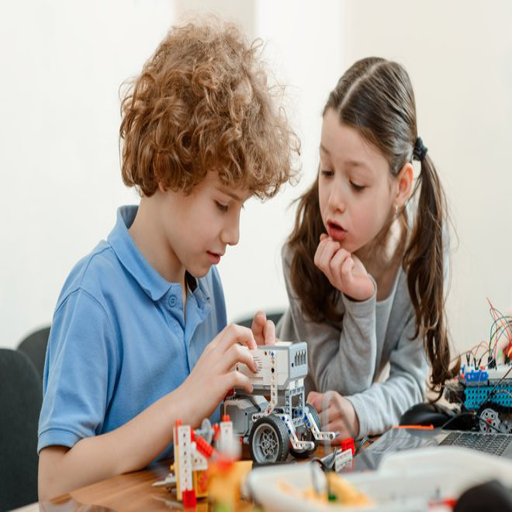

In [42]:
# alt load with PIL
img = PIL.Image.open('assets/107.jpg').convert("RGB").resize((512,512))
mask = PIL.Image.open('assets/107.png').convert("RGB").resize((512,512))
img

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [43]:
prompt = "two robots playing with a toy"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=img,
    mask_image=mask,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

100%|██████████| 50/50 [00:05<00:00,  9.38it/s]


In [44]:
images.insert(0, img)

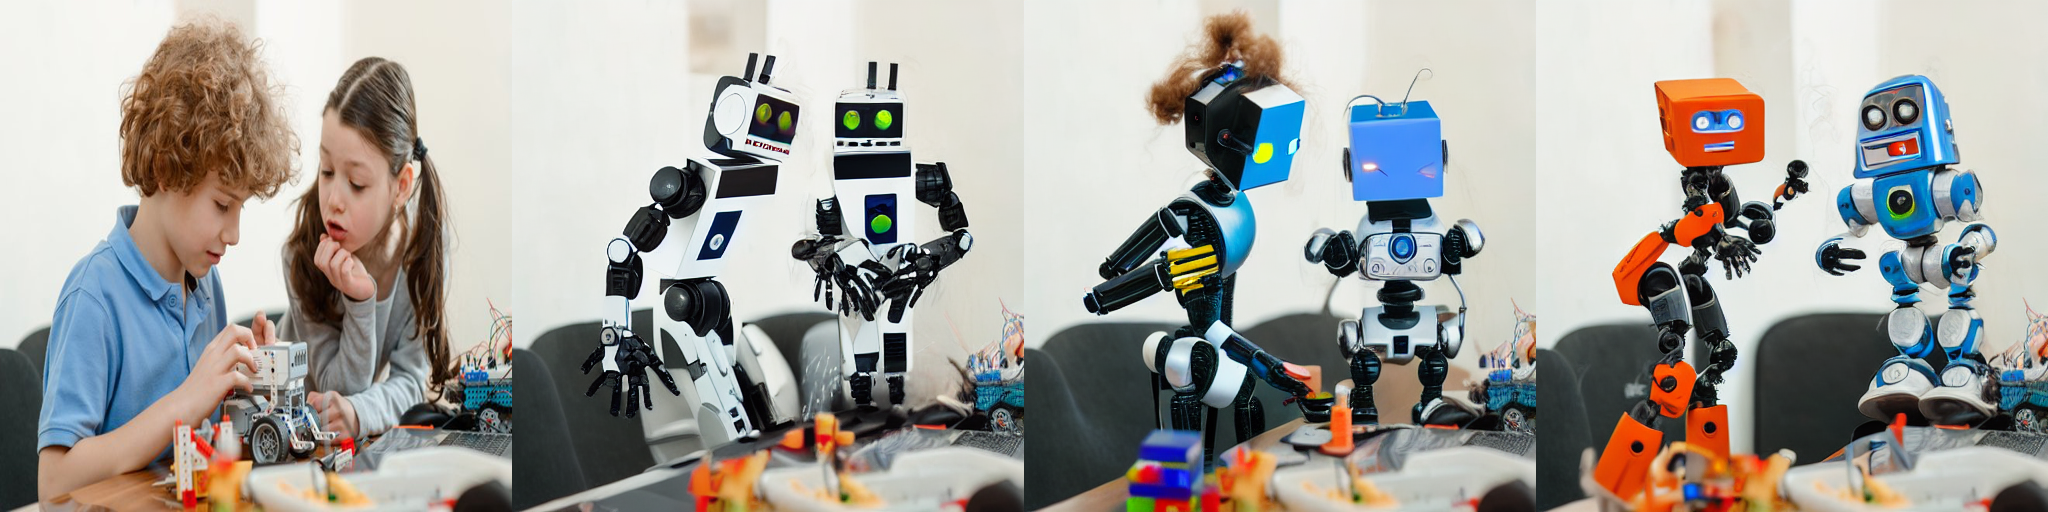

In [45]:
image_grid(images, 1, num_samples + 1)

In [46]:
prompt2 = "two boys playing with the toy"

images = pipe(
    prompt=prompt2,
    image=img,
    mask_image=mask,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

100%|██████████| 50/50 [00:05<00:00,  9.38it/s]


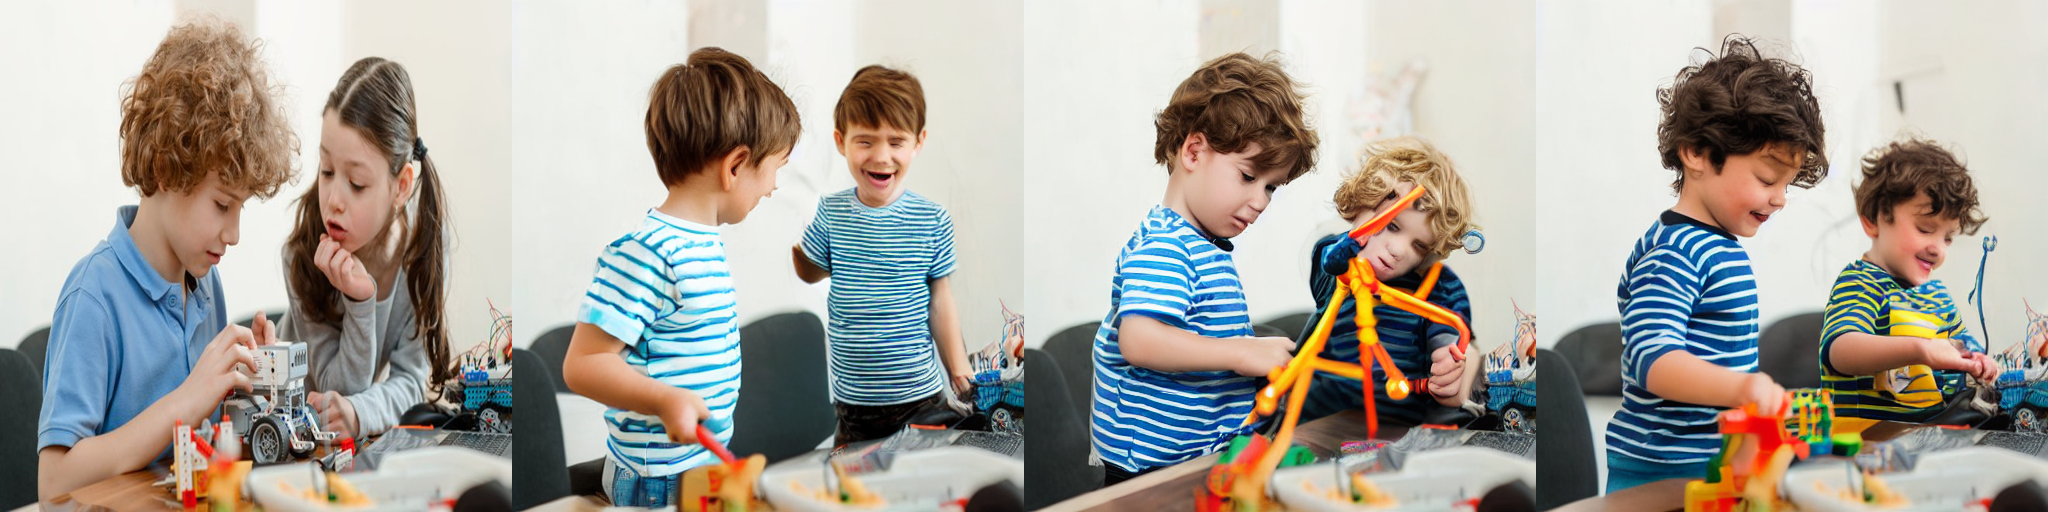

In [47]:
images.insert(0, img)
image_grid(images, 1, num_samples + 1)

In [48]:
prompt3 = "Lionel Messi and Leo Messi"

images = pipe(
    prompt=prompt3,
    image=img,
    mask_image=mask,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

100%|██████████| 50/50 [00:05<00:00,  9.38it/s]


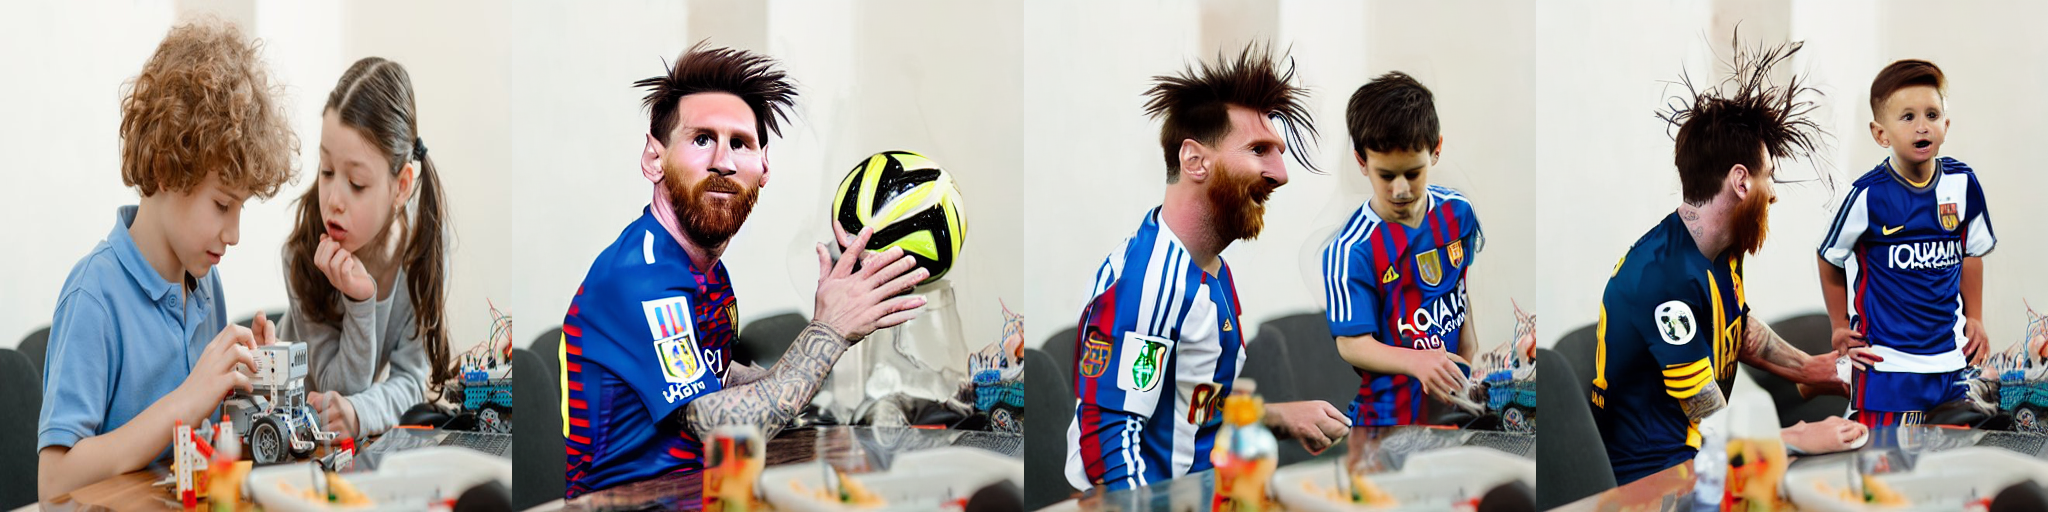

In [49]:
images.insert(0, img)
image_grid(images, 1, num_samples + 1)